# Part1:Data Preprocessing

In [1]:
## Importing the libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:/ML PROJECTS\Medical insurance prediction/insurance.csv")

## Data Exploration

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.select_dtypes(include="object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [8]:
len(df.select_dtypes(include="object").columns)

3

In [10]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [11]:
len(df.select_dtypes(include=["int64","float64"]).columns)

4

In [12]:
#statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
#Group the dataset by "sex","smoker","region"
df.groupby("sex").mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [16]:
df.groupby("smoker").mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [17]:
df.groupby("region").mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with missing values

In [19]:
df.isnull().values.any()

False

In [21]:
df.isnull().values.sum()

0

## Encoding the categorical data

In [22]:
df.select_dtypes(include="object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [23]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [24]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
#one hot encoding
df=pd.get_dummies(data=df,drop_first=True)

In [30]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [32]:
df.shape

(1338, 9)

## Correlation matrix

In [33]:
df_2=df.drop(columns="charges")

<AxesSubplot:title={'center':'Correlation with charges'}>

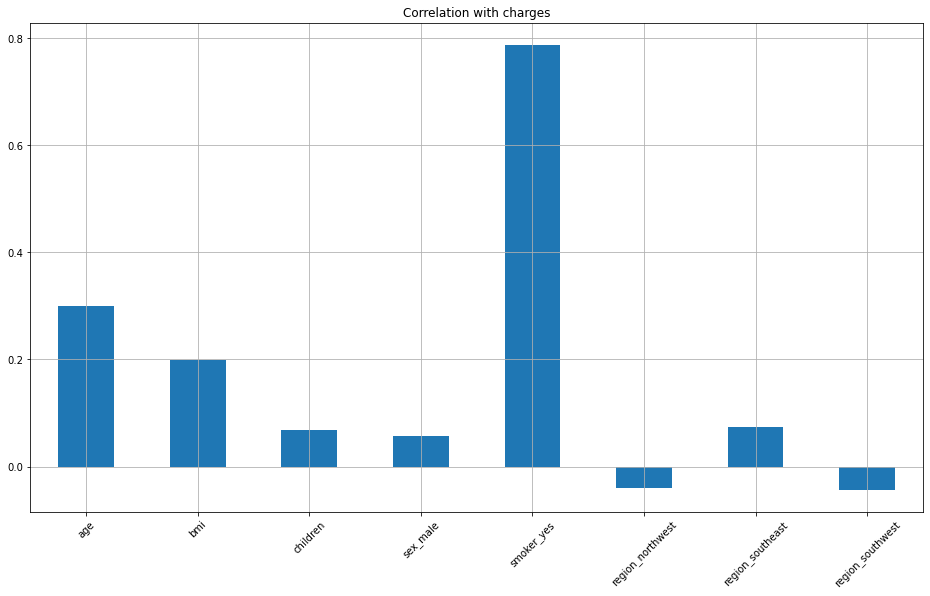

In [34]:
df_2.corrwith(df["charges"]).plot.bar(
figsize=(16,9),title="Correlation with charges",rot=45,grid=True
)

In [35]:
corr=df.corr()

<AxesSubplot:>

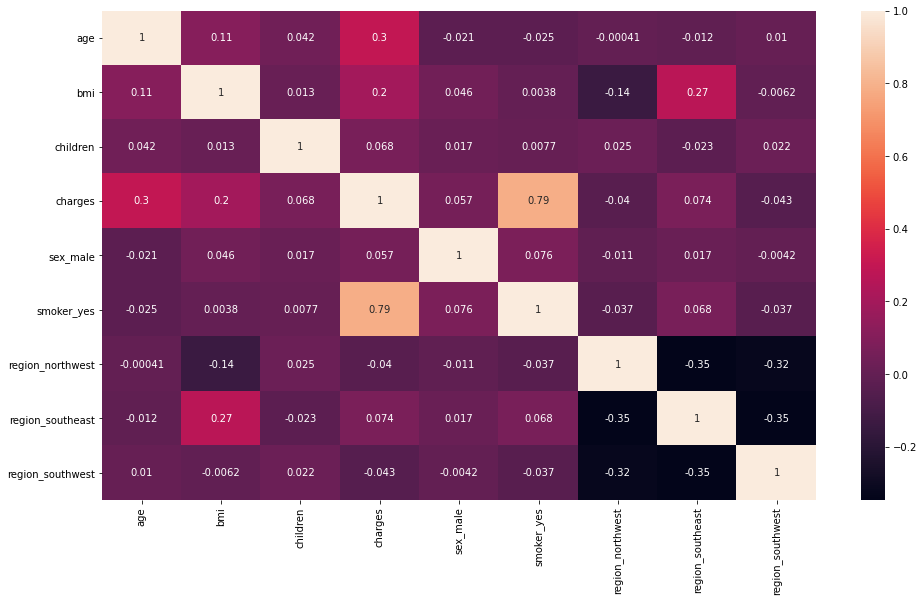

In [36]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [37]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [38]:
#matrix of features/independent variables
x=df.drop(columns="charges")

In [40]:
#target/dependent variable
y=df["charges"]

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
x_train.shape

(1070, 8)

In [45]:
y_train.shape

(1070,)

In [47]:
x_test.shape

(268, 8)

In [48]:
y_test.shape

(268,)

## Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [52]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [53]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part2:Building the model

## 1.Multiple linear regression

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
regressor_lr=LinearRegression()
regressor_lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred=regressor_lr.predict(x_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test,y_pred)

0.7999876970680434

## 2. Random forest regresson

In [62]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
y_pred=regressor_rf.predict(x_test)

In [64]:
r2_score(y_test,y_pred)

0.8842656048464017

## 3.XGBoost regression

In [66]:
from xgboost import XGBRFRegressor
regressor_xgb=XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [67]:
y_pred=regressor_xgb.predict(x_test)

In [69]:
r2_score(y_test,y_pred)

0.894639423491463

# Part3:Predict charges for a customer

In [70]:
#Name-Soumil,age=26,bmi=45.50,children=6,smoker=1,region=Northeast

In [71]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [73]:
soumil_obs=[[26,45.5,6,1,1,0,0,0]]

In [76]:
regressor_xgb.predict(sc.transform(soumil_obs))

array([41061.16], dtype=float32)